In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import glob
import xesmf as xe
from scipy import stats

def anomaly_finder(maps_ts):
    maps_calendar = np.reshape(maps_ts, (36,12,72,144))
    maps_anoms = maps_calendar - np.nanmean(maps_calendar, axis=0)
    anoms_maps_ts = np.reshape(maps_anoms, (36*12,72,144))
    return(anoms_maps_ts)

def trend_map(anoms_data):
    trend_map_data = []
    for lat in range(72):
        lat_data = []
        for lon in range(144):
            ts = anoms_data[:,lat,lon]
            time = np.linspace(0,len(ts)-1, len(ts))
            try:
                trend = stats.linregress(time, ts)[0]*120
            except:
                trend = np.NaN
            lat_data.append(trend)
        trend_map_data.append(lat_data)
    return(trend_map_data)

def smoother(anoms_data):
    for time in range(432):
        for lat in range(72):
            for lon in range(144):
                if np.isnan(anoms_data[time,lat,lon]):
                    surrounding_points = []
                    for lat_idx in [-1,0,1]:
                        for lon_idx in [-1,0,1]:
                            try:
                                surrounding_points.append(anoms_data[time,lat+lat_idx,lon+lon_idx])
                            except:
                                continue
                    anoms_data[time,lat,lon] = np.nanmean(surrounding_points)
                else:
                    continue
    return(anoms_data)

def LongitudeReorganizer(trend_map):
    trend_map = np.array(trend_map)
    trend_map = np.concatenate([trend_map[:,72:], trend_map[:,:72]], axis=1)
    return(trend_map)


in_situ_path = '/home/disk/pna2/aodhan/insitu_surface_products/'

ds_out = xe.util.grid_2d(-180.0, 180.0, 2.5, -90.0, 90.0, 2.5)

gistemp = xr.open_dataset(in_situ_path + 'gistemp1200_GHCNv4_ERSSTv5.nc')#.tempanomaly.values[-515:-83]
regridder_gistemp = xe.Regridder(gistemp, ds_out, 'bilinear', periodic=True)
gistemp_rg = regridder_gistemp(gistemp.tempanomaly)
gistemp_rg = gistemp_rg[-515:-83]
gistemp_anoms_ts = anomaly_finder(gistemp_rg.values)
gistemp_anoms_ts = smoother(gistemp_anoms_ts)
gistemp_trends = trend_map(gistemp_anoms_ts)
gistemp_trends = LongitudeReorganizer(gistemp_trends)
np.save('/home/disk/p/aodhan/SurfaceTrendLearing/PolarApplication/TASObsTrends/GISTEMPTrendMap19792014', gistemp_trends)

era5 = xr.open_dataset(in_situ_path + 'ERA5_TAS_monthly_1979_2014.nc')#.t2m.valuesls
regridder_era5 = xe.Regridder(era5, ds_out, 'bilinear', periodic=True)
era5_rg = regridder_era5(era5.t2m)
era5_anoms_ts = anomaly_finder(era5_rg.values)
era5_trends = trend_map(era5_anoms_ts)
era5_trends = LongitudeReorganizer(era5_trends)
np.save('/home/disk/p/aodhan/SurfaceTrendLearing/PolarApplication/TASObsTrends/ERA5TrendMap19792014', era5_trends)

hadcrut = xr.open_dataset(in_situ_path + 'HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')#.tas_mean.values[-515:-83]
regridder_hadcrut = xe.Regridder(hadcrut, ds_out, 'bilinear', periodic=True)
hadcrut_rg = regridder_hadcrut(hadcrut.tas_mean)
hadcrut_rg = hadcrut_rg[-515:-83]
hadcrut_anoms_ts = anomaly_finder(hadcrut_rg.values)
hadcrut_anoms_ts = smoother(hadcrut_anoms_ts)
hadcrut_trends = trend_map(hadcrut_anoms_ts)
hadcrut_trends = LongitudeReorganizer(hadcrut_trends)
np.save('/home/disk/p/aodhan/SurfaceTrendLearing/PolarApplication/TASObsTrends/HadCrutTrendMap19792014', hadcrut_trends)

noaa = xr.open_dataset(in_situ_path + 'NOAAGlobalTemp_v5.0.0_gridded_s188001_e202111_c20211210T133255.nc')#.anom.values[-515:-83]
regridder_noaa = xe.Regridder(noaa, ds_out, 'bilinear', periodic=True)
noaa_rg = regridder_noaa(noaa.anom)
noaa_rg = noaa_rg[-515:-83]
noaa_anoms_ts = anomaly_finder(noaa_rg.values)
noaa_anoms_ts = smoother(noaa_anoms_ts)
noaa_trends = trend_map(noaa_anoms_ts)
noaa_trends = LongitudeReorganizer(noaa_trends)


/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: Mean of empty slice


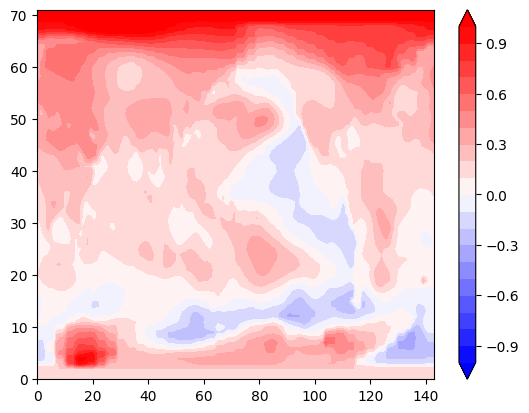

In [11]:
plt.contourf(gistemp_trends, levels=np.linspace(-1,1,21), cmap='bwr', extend='both')
plt.colorbar()

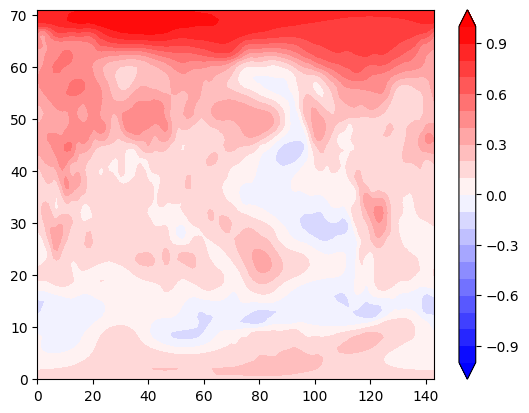

In [12]:
plt.contourf(hadcrut_trends, levels=np.linspace(-1,1,21), cmap='bwr', extend='both')
plt.colorbar()



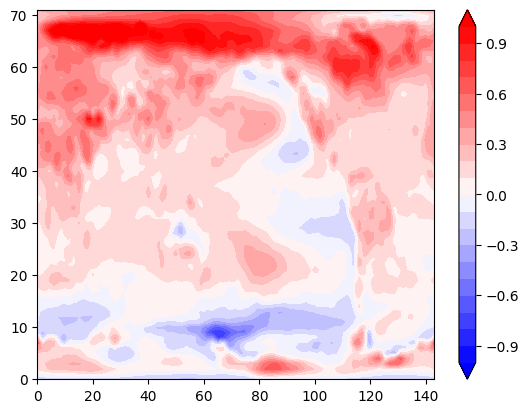

In [13]:
plt.contourf(era5_trends, levels=np.linspace(-1,1,21), cmap='bwr', extend='both')
plt.colorbar()

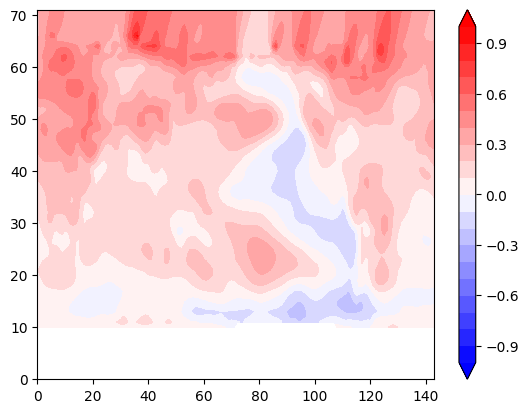

In [14]:
plt.contourf(noaa_trends, levels=np.linspace(-1,1,21), cmap='bwr', extend='both')
plt.colorbar()